<a id='home'></a>

# Machine Learning Engineer Nanodegree
## Capstone Project


* [Definition](#step1) : Problem Definition Section
* [Analysis](#step2) : Analysis Conducted
* [Methodology](#step3) : Methodology Adopted
* [Results](#step4) : Results of Analysis
* [Conclusion](#step5) : Inferences Drawn
* [Reference](#step6) : References Used


<a id='step1'></a>
## Definition

* [Project Overview](#stepa): Overview
* [Problem Statement](#stepa) : Detailed statement
* [Metrics](#stepc) : Evaluation Parameter

#### [Home](#home) : Back to Top


<a id='stepa'></a>

### Project Overview: Creating Customer Segments from NYC School Data
In this project, we are considering data from Kaggle courtesy PASSNYC, a not-for-profit organization that facilitates a collective impact that is dedicated to broadening educational opportunities for New York City's talented and underserved students.  PASSNYC uses public data to identify students within New York City’s under-performing school districts and, through consulting and collaboration with partners, aims to increase the diversity of students taking the Specialized High School Admissions Test (SHSAT). 

The objective is to assess the needs of students by using this data to quantify the challenges students face in taking the SHSAT. By segmenting and clustering, we can identify the schools where minority and underserved students stand to gain the most from services like after school programs, test preparation, mentoring, or resources for parents.

My personal motivation in selecting this domain is two-fold. I work for a company matching high school athletes to sports programs, so I wish to understand clustering better as applicable to school programs.  Also, as an online student and micro-volunteer with school programs, it is of personal interest too.

<a id='stepb'></a>

### Problem Statement:
In this project, the objective is to describe the variation in the different types of schools present in NYC. Based on demographic diversity or lack thereof other features of the school, the idea is to create categories of that represent subsets that together represent all the schools. Doing so will better equip these programs and how best to serve the schools. 
In this project, the objective is to describe the variation in the different types of schools present in NYC. Based on demographic diversity or lack thereof other features of the school, the idea is to create subsets that together represent all the schools. The intent is that by segmenting and clustering, we gain an improved understanding of the segments/schools where minority and underserved students stand to gain the most from services like after school programs, test preparation, mentoring, or resources for parents. Thus, this clustering can be used to better equip these programs and better serve the schools. 

To perform clustering on the data, we shall be using two techniques :Gaussian Mixture model and K-means clustering to create the clusters and decide on the optimal number of clusters. 

The strategy is to assess which features are essential, then create clusters to segment the historical data. The expected solution will be able to create the required clusters with appropriate degree of accuracy and be on par or be better than the benchmark solution.
We are using silhouette scores and elbow curve method to determine the appropriateness of the solution and number of clusters. 

<a id='stepc'></a>

### Metrics:
Here, our solution is to determine the different segments present in the dataset. We will quantify the "goodness" of the clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient will provide for a simple scoring method for our clustering and we shall take the best silhouette score of the different algorithms used.
Silhouette score can be computed using sklearn library.
Additionally, we will also verify the optimal number of clusters using the Elbow curve method.

From the documentation at: https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient, we have the eqaution as:
The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster.
The Silhouette Coefficient s for a single sample is then given as:
**s= (b-a)/ max(a,b)**
The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

It has the advantages as :
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

The reason this metric is appropriate for the problem at hand is that as the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient is an apt for such an evaluation, with a higher Silhouette Coefficient score relates to a model with better defined clusters. 

<a id='step2'></a>


## Analysis

* [Data Exploration](#stepx): Exploratory Analysis
* [Exploratory Visualization](#stepy) :Vizzes and Exploration
* [Algorithms and Techniques](#stepz) : Methods adopted
* [Benchmark](#stepq) : Reference Model

#### [Home](#home): Back to Top

<a id='stepx'></a>

### Data Exploration
The dataset are taken from Kaggle at:
https://www.kaggle.com/laiyipeng/target-schools-action-recommended-for-passnyc/data

This is a bunch of datasets hosted by the City of New York and has demographic statistics broken down by school districts. It contains data about the percentage of students who belong to various races like White, Latino/Hispanic, African American, Pacific Islander or Alaskan, multi racial, economically disdvantaged. Their ELA and Math test scores are also provided, both averages as well as for each grade 3-8. We also have attributes such as Economic Need Index, Student Attendance Rate, Ratings on parameters such as Rigorous Instruction, Effective School Leadership, Trust, etc. 
By joining on the SHSAT dataset, we also get the corresponding values of how many students registered and then attempted the test, as well as how many were finally made an offer. that is we have the demographic breakup, student test scores, SHSAT participation (registration and performance) and final outcome (offers made). 

In this project, I have combined multiple datasets as given in original Kaggle competition and the benchmarke model.
The first dataset conisdered is the '2016 School Explorer.csv' composed of over 150 columns and 1200 entries. However, these columns were mostly the gradewise ELA and Math scores overall and for specific races. Hence, I combined the scores for each cohort as under and then visualized using a heatmap (in next sections).

This dataset was combined with 'D5 SHSAT Registrations and Testers.csv' which consisted of records of schools in NYC, number of students who registered for the SHSAT and number of students who took the SHSAT. It was further combined with '2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv'. This contained the names of feeder schools, count of Students in HS Admissions, number of Testers as well as count of Offers.

By combining the English and Math scores of schools and their ethnic groups, the counts of students registering and appearing for SHSAT along with the number of students getting offers, we have a complete look at student outcomes for each school and their ethnic segments.
It then follows that segmenting these audiences is very much possible and highly useful in identifying trends and patterns and understanding the general population-wise groupings that exist.

Snapshot of columns in the merged dataset

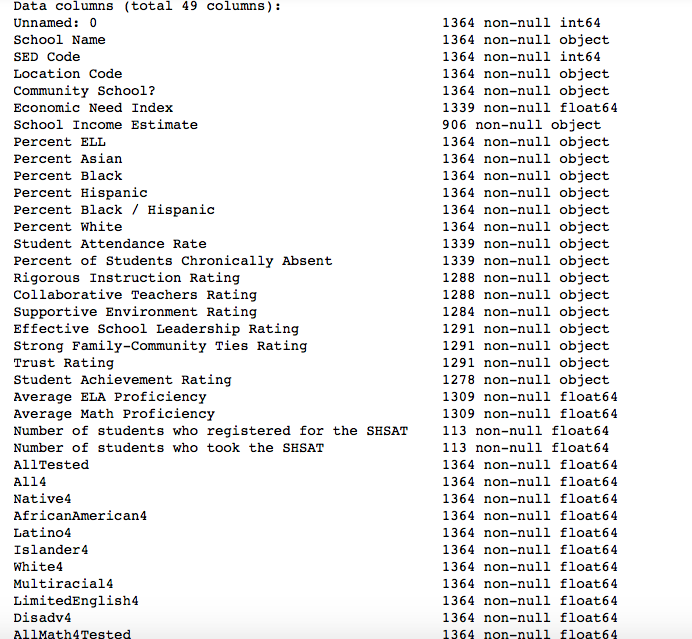

Snapshot of statistics is provided here- details in attached python notebook.

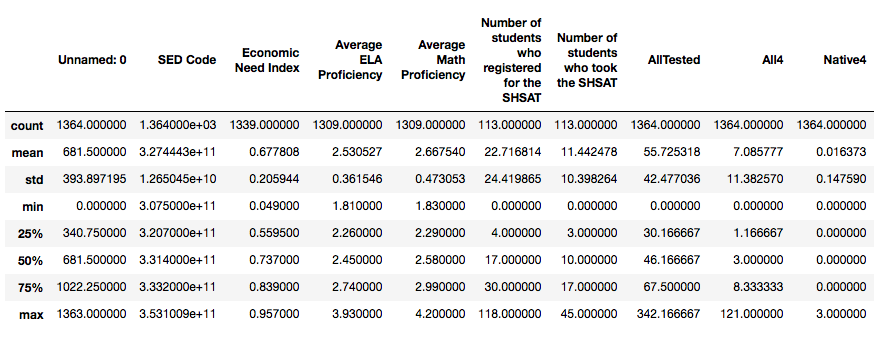

<a id='stepy'></a>

### Exploratory Visualization

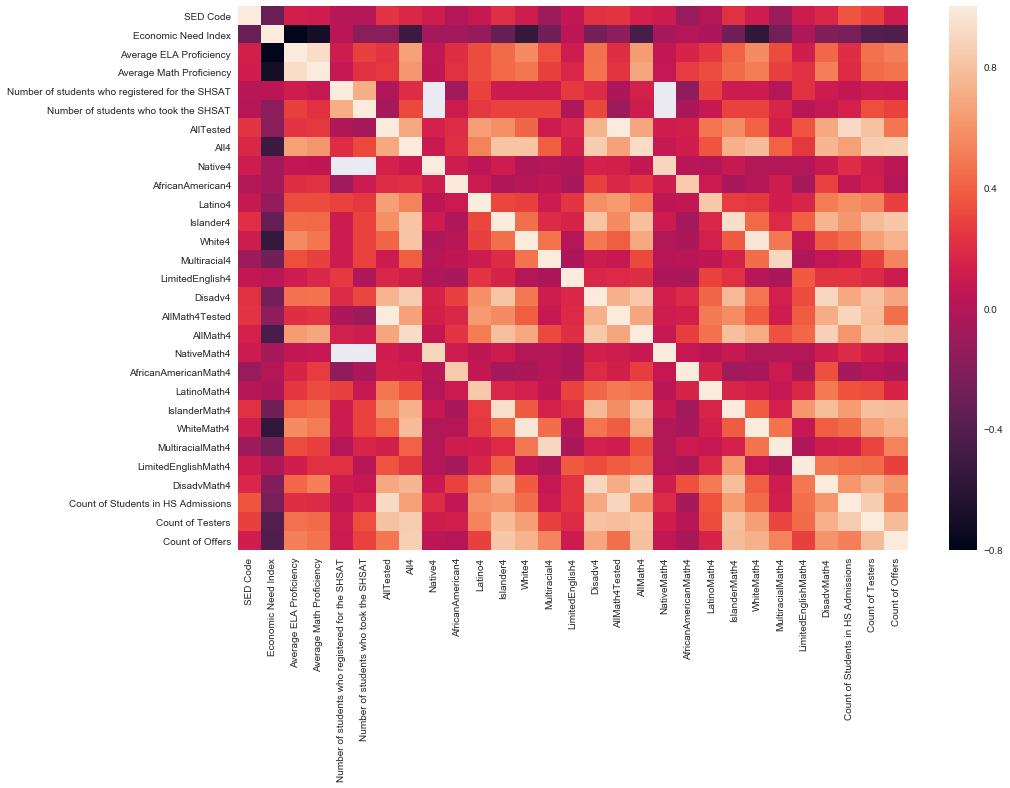

### Insights:
From the correlation values and heatmap, we can see that 'Economic Need Index' is inversely correlated with high negative values to 
- 'Average ELA Proficiency', 
- 'Average Math Proficiency', 
- 'White4',  
- 'WhiteMath4', 
- 'Count of Testers' and
- 'Count of Offers'. 

Thus, the general assumption that schools with greater economic needs 
- perform more poorly on ELA and Math tests, 
- have lesser White students,
- have fewer students taking the tests and
- consequently getting less SHSAT offers holds true.


Now to apply clustering techniques, we will limit the number of features further. We will use only the following columns as :
- 'Economic Need Index',
- 'AfricanAmerican4',
-  'Latino4',
-  'White4',
-  'AfricanAmericanMath4',
-  'LatinoMath4',
-  'WhiteMath4',
-  'Number of students who took the SHSAT',
-  'Count of Students in HS Admissions',
-  'Count of Offers']

We use a decision tree regressor to fit the data to the training set. We report the score of the prediction using the testing set using sklearn library modules.

The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance. Thus, 'Count of Offers' and 'Economic Need Index' are important features while 'Number of students who took the SHSAT' is of medium importance and validate our choice of features in the subset we are considering.

<a id='stepz'></a>

### Algorithms and Techniques
Here we will be using Kmeans and GMM algorithms to determine the best clustering method for the datasets. We will use scatterplot matrix, Elbow curve and Silhouette score to evaluate if the number of clusters is optimal. The silhouette score will also be used to compare against benchmark model.

##### Kmeans:
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data i.e., data without defined categories or groups. The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 


##### GMM:
The Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. GMM clustering can accommodate clusters that have different sizes and correlation structures within them. (Though like most clustering methods, one must specify the number of desired clusters before fitting the model.) This method will also ensure that the main practical issues with k-means will be removed namely, allowing for a full covariance and not using hard cutoffs for cluster assignment within the training set. thus, we can be sure that the best clusters and numbers are obtained.

##### Relevance:
We are using Kmeans and GMM clustering algorithms since our data in unlabeled and we want to find the groups that form organically. Using the libraries in Python, the algorithms are easy to implement, provide tight clusters and with our use of Silhouette score can give us the optimal number of clusters. 

Scatterplot Matrix:

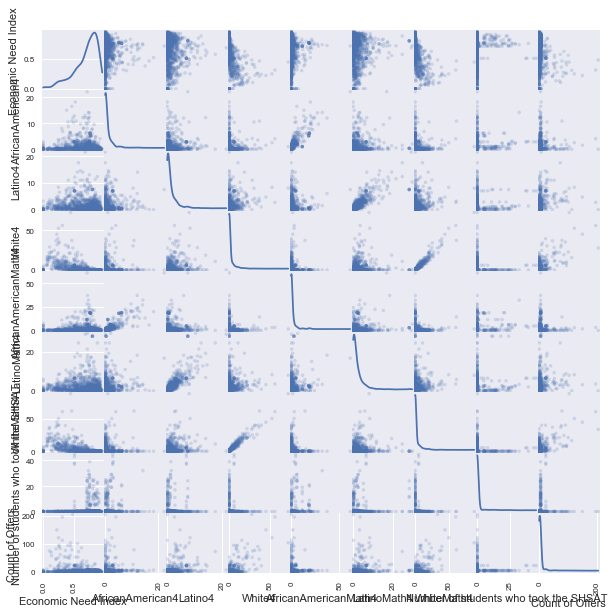

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
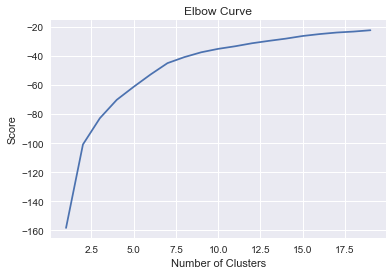

Thus, we can consider 3 clusters although 7 or 8 clusters also look feasible using the Elbow Curve method.

<a id='step3'></a>

## Methodology

### Data Preprocessing
Since the dataset is from Kaggle, only minimal preprocessing was done on the dataset. Most of the wrangling was simply joining the datasets and subsetting to include only relevant attributes. The rating percentages had converted to float values with the percent symbol stripped while test scores for all each particular race was computed as average of individual grade level scores. Feature relevance was determined by using creating a decision tree regressor and fitting it to the training set and then reporting the score of the prediction using the testing set.

### Implementation
For execution, we will be using Python's sklearn libraries and documentation to determine the clusters and centers using K-means. We will then do the same with GMM algorithm and further compute the silhouette score. We shall do so for cluster numbered for 3,4,7,8.
We will then compute silhouette score for clusters numbered 3 to 8 using Kmeans and additionally create cluster maps to see how each clsuter number chosen fared.

We used Python libraries avaliable for this specifically including:
- sklearn.cluster.KMeans 
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- sklearn.metrics.silhouette_score 
(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
- sklearn.metrics.silhouette_samples
(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html)
- sklearn.mixture.GMM
(https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

### Refinement
The refinement was basically to evaluate which cluster number gave the best results. Hence, both GMM and Kmeans algorithms were used. Also, my proposal initially considerd only silhouette score. However, I added elbow curve method as well and evaluated this metric for all the cluster numbers and for both algorithms to hone in on the right groups. 

**Overview of Elbow curve method:**
One method to validate the number of clusters in unsupervised learning is the elbow method. The idea of the elbow method is to run the clustering on the dataset for a range of values of k (for kmeans clustering, k from 1 to 20 in our case here), and for each value of k calculate the sum of squared errors (SSE). Then, we plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

The parameters tuned were the initial features: the ELA and Math scores-took average for the ethnic groups, the values of students taking tests and also of offers made. I had took a subset from initial large merged datasets based on the correlation matrix and also used feature relevance to validate that subset did indeed have relevat attributes. Also, as the silhouette scores were zero for some cluster numbers, it was important to use both methods to arrive at the correct number of clusters.


#### [Home](#home): Back to Top

By using the scores for cluster numbers from 3 to 8, for clusters =3, we get the best results when considering clustermap, GMM and K-means techniques.

<a id='stepq'></a>

### Benchmark:
For this project, the benchmark model is the kernel from the Kaggle dataset at:
https://www.kaggle.com/laiyipeng/target-schools-action-recommended-for-passnyc
<br>It was one of the winners when the competition (using this dataset) originally ran. There are 3 clusters present in this analysis. I shall try to compare my model with this analysis.

In the benchmark model, we have:
1) New York State annual test results</br>
2) New York City Department of Education annual quality review</br>
3) Other</br>

Since this original kernel is in R and approaches the problem with a different angle and does not compute silhouette score, I have reproduced the dataset and joins used and computed the silhouette scores for this model.

<a id='step4'></a>

## Results 
* [Model Evaluation and Validation](#step11): Evaluation of Analysis
* [Justification](#step12): Validation based final inference

#### [Home](#home): Back to Top

<a id='step11'></a>

### Model Evaluation and Validation
Silhouette score is the best for clusters =3 in our model using GMM technique. For K-means it shows best as clusters =4, and close to 0 for clusters =3, but the visuals clearly show that this is a result of overlapping. Given that Kmeans suffer from spherical clustering, this seems to validate the score as 3. When we compare with our benchmark model too, we get the silhouette score as same for clusters =3 to clusters =8 but the visuals clearly show the homogenous clustering for clusters =3. Thus, we can acertain that clusters =3 is the optimal solution and comparable to benchmark model.

The values obained are:
Using Kmeans clustering:
For n_clusters = 3 The average silhouette_score is : 0.243592391953
For n_clusters = 4 The average silhouette_score is : 0.266591843412
For n_clusters = 5 The average silhouette_score is : 0.266591843412
For n_clusters = 6 The average silhouette_score is : 0.266775421534
For n_clusters = 7 The average silhouette_score is : 0.266591843412
For n_clusters = 8 The average silhouette_score is : 0.266591843412
Using GMM:
Scores for 8 clusters is 0.0867
Scores for 7 clusters is 0.1008
Scores for 4 clusters is 0.1711
Scores for 3 clusters is 0.2614

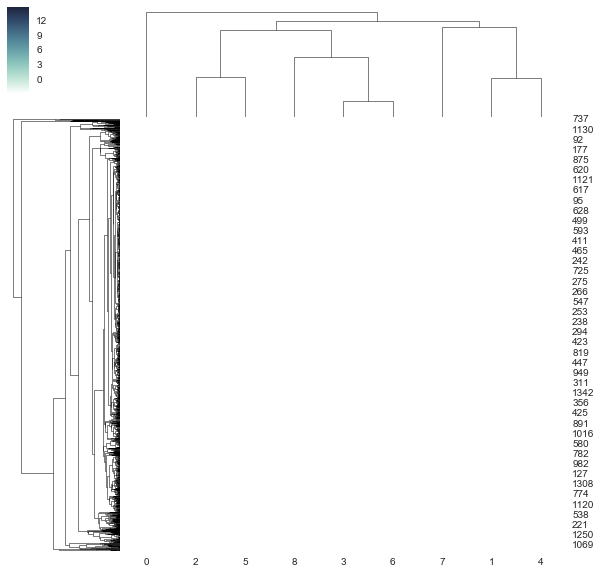

For our model, we have:

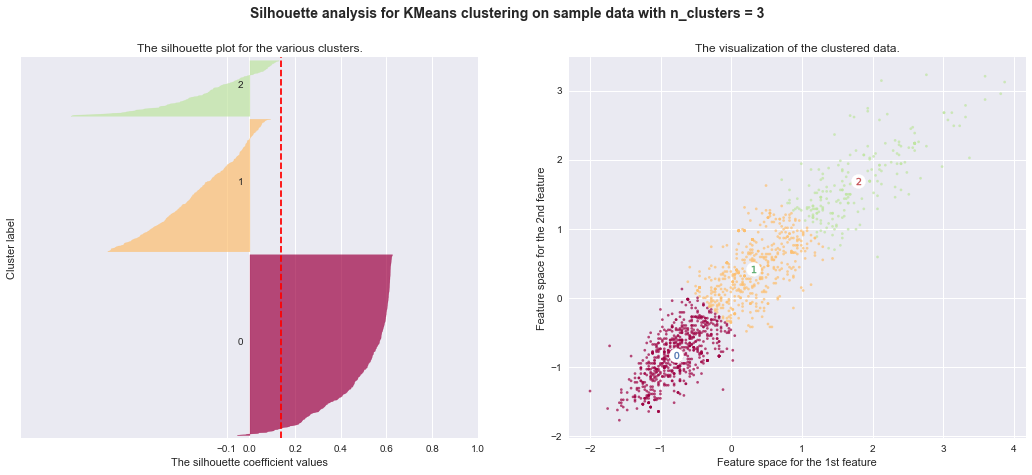

For benchmark model, we have:

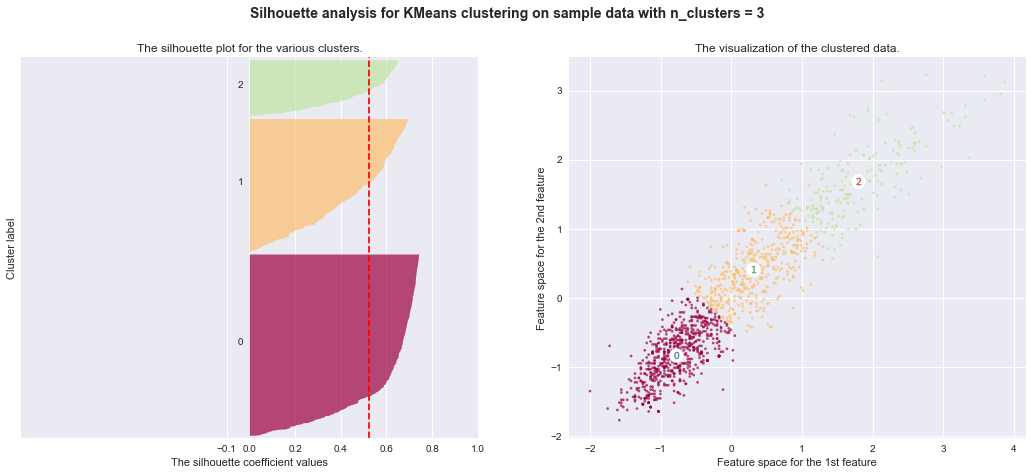

<a id='step12'></a>

### Justification
For the benchmark model as well, the best scores and homogenous clusters are for clusters = 3 with SIlhouette score of 0.2455. It also is important to note that the original benchmark solution had ascertained cluster number as 3 though not using the techniques we employ. Thus, we can see that the clustering algorithms applied using our methods provides an equal measure of accuracy and hence, we can consider out model to be a good model.

<a id='step5'></a>


## Conclusion

#### [Home](#home): Back to Top

### Reflection
In this project, the intent was to categorize the schools based on the variables, finding the optimal number of segments along the way. We did this using Kmeans and GMM with silhouette score as the basis of evaluation and comparison against benchmark model.
One aspect that was interesting and challenging was determining the best silhouette score since we had very close values for the benchmark model for clusters numbering from 3 to 8. However, it is the visuals that help to pinpoint the right size. Again, for our model, GMM matched but not K-means; where it seemed like the right size did not match since 4 seemed to have best silhouette score value. Here too, the visuals provided a better comprehension with the overlapping effect evident (score of 0 again indicates close clusters which holds true with spherical contraints of k-means).

### Improvement
One aspect of the analysis that can be improved is to use the analysis is to evaluate the performance using additional features. With improved feature relevance prediction, we can further refine our model.
Another aspect is to use  adifferent evaluation metric for the model to see if it can be further improved on. Here we use silhouette score but values like Calinski-Harabaz Index,Davies-Bouldin Index to evaluate our model.

<a id='step6'></a>

### References
Please find below referenced articles and links in addition to those added in relevant sections.
- http://www.awesomestats.in/python-cluster-validation/ 
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
- http://scikit-learn.org/stable/modules/clustering.html
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
- https://en.wikipedia.org/wiki/Elbow_method_(clustering)
- https://bigdata-madesimple.com/possibly-the-simplest-way-to-explain-k-means-algorithm/
- https://www.datascience.com/blog/k-means-clustering
- https://bl.ocks.org/rpgove/0060ff3b656618e9136b

#### [Home](#home)